# Data analysis and graphing

In [16]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/youngung/.pyenv/versions/3.8.0/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['disp', 'time']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [17]:
pwd # 현재 위치 출력

'/Users/youngung/repo/lecture_materials/ipynb/metal_forming'

In [18]:
## 파일이름 "uniaxial_data_if_steel.dat"가 다음의 위치에 주어져 있음

파일의 실제 위치: /Users/사용자이름/repo/lecture_materials/data/uniaxial_data_if_steel.dat

윈도우의 경우(예): C:\users\user\repo\lecture_materials\data\uniaxial_data_if_steel.dat

In [19]:
filename='../../data/uniaxial_data_if_steel.dat'

In [20]:
## 아래 명령어를 통해, 처음 20번째 줄 까지는 실험 정보임을 알 수 있음. 
## 첫번째 칼럼은 시간(time), 두번째 칼럼은 (displacement, extension), 그리고 세번째 칼럼은 (Force), 네번째 칼럼은 사실 쓰지 않은 signal임.

In [21]:
!cat -n ../../data/uniaxial_data_if_steel.dat | head -n 30































cat: stdout: Broken pipe


- 시편의 폭과 두께가 주어져 있다 (8번째 그리고 9번째 라인 참고)

In [22]:
#따라서, 초기 푹과 두께를 다음과 같이 변수 w와 t에 저장하자.
w=12.638
t=1.2
# 그리고 초기 gauge length는 50 mm 이다.
l=50.

## 파일에서 NumPy array로 읽기

- np.loadtxt 함수를 사용하자. 변수는 우선 위의 파일 이름과, (skiprows 옵션)을 활용하여 처음 20줄은 건너뛰자.

In [23]:
dat=np.loadtxt(filename,skiprows=20)

- 파일에서 읽어진 데이터가 위와 같이 dat이름의 NumPy로 저장되며, 그 shape은 다음과 같다.

In [24]:
dat.shape ## 행렬로 읽어들어짐,   주의 행(row)은 가로 그리고 렬은 세로를 뜻함. 
## 총 데이터 라인이 10002줄임을 알 수 있음

(10002, 4)

- dat의 첫번째 column은 시간, 두번째 column은 axial strain, 세번째 coloum은 힘이다. 

- 각 column을 slicing하여 각각 time, eps, force 라는 이름의 배열로 저장하자.

In [25]:
time=dat[:,0] ## time
disp=dat[:,1] ## axial strain
disp=disp-disp[0] ## displacement 영점 잡기
force=dat[:,2] ## axial force

## 시간에 따라 변한 displacement

Text(0, 0.5, 'Displacement [mm]')

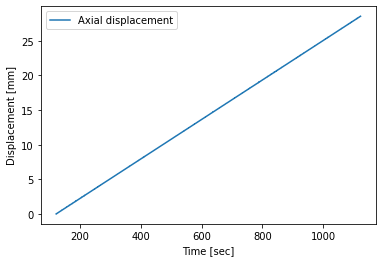

In [26]:
ax=gca() ## plotting할 axis object를 생성
ax.plot(time,disp,label='Axial displacement') ## 생성된 axis object에 time vs displacement graph, 그리고 라벨링
ax.legend() # graph에 legend 추가
ax.set_xlabel('Time [sec]') # 수평선에 라벨링
ax.set_ylabel('Displacement [mm]') # 수평선에 라벨링

## 데이터 분석

- displacment로부터 공칭 변형률을 계산하자.

 $\varepsilon^{engi}=\Delta l/l_0$

In [27]:
eps_engi=disp/l

- engineering strain으로부터 진변형률을 구하자

$\varepsilon^{true}=\ln(1+\varepsilon^{engi})$

In [28]:
eps_true=np.log(1+eps_engi)

- Engineering stress를 구하자!

In [34]:
sig_engi=force/t/w

- True stress를 구하자

In [37]:
sig_true=sig_engi*(1+eps_engi)

- 시간에 따라 변한 변형률을 그려보자

Text(0, 0.5, 'Strain')

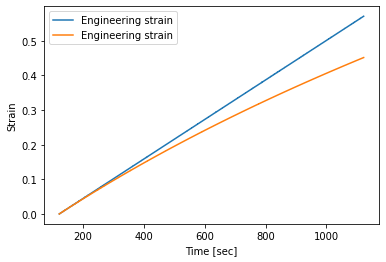

In [30]:
ax=gca() ## plotting할 axis object를 생성
ax.plot(time,eps_engi,label='Engineering strain') ## 생성된 axis object에 t vs x graph, 그리고 라벨링
ax.plot(time,eps_true,label='Engineering strain') ## 생성된 axis object에 t vs x graph, 그리고 라벨링
ax.legend() # graph에 legend 추가
ax.set_xlabel('Time [sec]') # 수평선에 라벨링
ax.set_ylabel('Strain') # 수평선에 라벨링

- 시간에 따라 변한 힘(하중)을 그려보자

Text(0, 0.5, 'Axial strain')

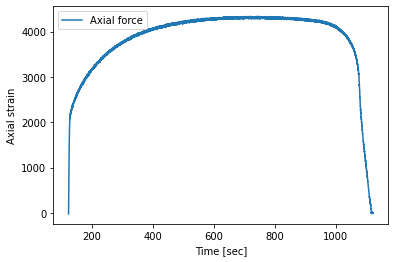

In [31]:
ax=gca()
ax.plot(time,force,label='Axial force')
ax.legend() # graph에 legend 추가
ax.set_xlabel('Time [sec]') # 수평선에 라벨링
ax.set_ylabel('Axial strain') # 수평선에 라벨링

- 변형률에 따라 달라진 하중을 그려보자

Text(0, 0.5, 'Force')

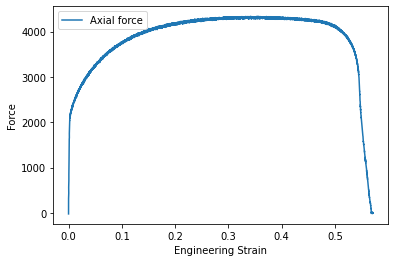

In [33]:
ax=gca()
ax.plot(eps_engi,force,label='Axial force')
ax.legend() # graph에 legend 추가
ax.set_xlabel('Engineering Strain') # 수평선에 라벨링
ax.set_ylabel('Force') # 수평선에 라벨링

Text(0, 0.5, 'Stress [MPa]')

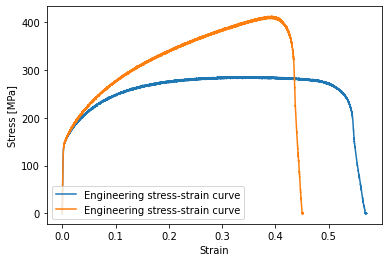

In [38]:
ax=gca()
ax.plot(eps_engi,sig_engi,label='Engineering stress-strain curve')
ax.plot(eps_true,sig_true,label='Engineering stress-strain curve')
ax.legend() # graph에 legend 추가
ax.set_xlabel('Strain') # 수평선에 라벨링
ax.set_ylabel('Stress [MPa]') # 수평선에 라벨링